___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
** NOTE: This project is extremely challenging because it will introduce a lot of new concepts and have you looking things up on your own (we'll point you in the right direction) to try to solve the tasks issued. Feel free to just go through the solutions lecture notebook and video as a "walkthrough" project if you don't want to have to look things up yourself. You'll still learn a lot that way! **
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture.*

### The Imports

Already filled out for you.

In [1]:
import pandas_datareader as pdr
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

import os 

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)

### WARNING: MAKE SURE TO CHECK THE LINK ABOVE FOR THE LATEST WORKING API. "google" MAY NOT ALWAYS WORK. 
------------
### We also provide pickle file in the article lecture right before the video lectures.

In [2]:
## Reading bank information from the pickle file
all_banks = pd.read_pickle('all_banks')
all_banks['C']

Stock Info,Open,High,Low,Close,Volume
Date,,,,,
2006-01-03,490.00,493.80,481.10,492.90,1537660
2006-01-04,488.60,491.00,483.50,483.80,1871020
2006-01-05,484.40,487.80,484.00,486.20,1143160
2006-01-06,488.80,489.00,482.00,486.20,1370250
2006-01-09,486.00,487.40,483.00,483.90,1680740
...,...,...,...,...,...
2015-12-24,52.48,52.97,52.45,52.71,4671254
2015-12-28,52.57,52.57,51.96,52.38,8761743
2015-12-29,52.76,53.22,52.74,52.98,10155134


In [3]:
start = datetime.datetime(2006,1,1)
end =   datetime.datetime(2016,1,1)

In [4]:
## Reading information from Tiingo 
## Bank of America 
BAC = pdr.get_data_tiingo('BAC', start = start, end = end, api_key = 'c34132b93ec4954e5df2a69d3ee980297acc7896')

##Citigroup - Get from pickle file similarities in our data 
C = pdr.get_data_tiingo('C', start = start, end = end, api_key = 'c34132b93ec4954e5df2a69d3ee980297acc7896')

#Goldman Sachs
GS = pdr.get_data_tiingo('GS', start = start, end = end, api_key = 'c34132b93ec4954e5df2a69d3ee980297acc7896')

#JPMorgan Chase
JPM = pdr.get_data_tiingo('JPM', start = start, end = end, api_key = 'c34132b93ec4954e5df2a69d3ee980297acc7896')

#Morgan Stanley
MS = pdr.get_data_tiingo('MS', start = start, end = end, api_key = 'c34132b93ec4954e5df2a69d3ee980297acc7896')

#Wells Fargo - Get from pickle file to maintain similarities in our data
WFC = pdr.get_data_tiingo('WFC', start = start, end = end, api_key = 'c34132b93ec4954e5df2a69d3ee980297acc7896')

In [5]:
banks = [BAC, C, GS, JPM, MS, WFC]

for bank in banks:
    bank.reset_index(inplace = True)
    bank.drop('symbol', axis = 1, inplace = True)
    bank.set_index('date', inplace = True)

In [6]:
BAC.head()

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
date,,,,,,,,,,,,
2006-01-03 00:00:00+00:00,47.08,47.18,46.15,46.92,16296700,33.991319,34.063518,33.319868,33.875800,16296700,0.0,1.0
2006-01-04 00:00:00+00:00,46.58,47.24,46.45,47.00,17757900,33.630324,34.106837,33.536465,33.933560,17757900,0.0,1.0
2006-01-05 00:00:00+00:00,46.64,46.83,46.32,46.58,14970700,33.673643,33.810821,33.442606,33.630324,14970700,0.0,1.0
2006-01-06 00:00:00+00:00,46.57,46.91,46.35,46.80,12599800,33.623104,33.868580,33.464266,33.789161,12599800,0.0,1.0
2006-01-09 00:00:00+00:00,46.60,46.97,46.36,46.72,15619400,33.644763,33.911900,33.471486,33.731402,15619400,0.0,1.0


In [7]:
BAC.index

DatetimeIndex(['2006-01-03 00:00:00+00:00', '2006-01-04 00:00:00+00:00',
               '2006-01-05 00:00:00+00:00', '2006-01-06 00:00:00+00:00',
               '2006-01-09 00:00:00+00:00', '2006-01-10 00:00:00+00:00',
               '2006-01-11 00:00:00+00:00', '2006-01-12 00:00:00+00:00',
               '2006-01-13 00:00:00+00:00', '2006-01-17 00:00:00+00:00',
               ...
               '2015-12-17 00:00:00+00:00', '2015-12-18 00:00:00+00:00',
               '2015-12-21 00:00:00+00:00', '2015-12-22 00:00:00+00:00',
               '2015-12-23 00:00:00+00:00', '2015-12-24 00:00:00+00:00',
               '2015-12-28 00:00:00+00:00', '2015-12-29 00:00:00+00:00',
               '2015-12-30 00:00:00+00:00', '2015-12-31 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='date', length=2517, freq=None)

In [8]:
C.index

DatetimeIndex(['2006-01-03 00:00:00+00:00', '2006-01-04 00:00:00+00:00',
               '2006-01-05 00:00:00+00:00', '2006-01-06 00:00:00+00:00',
               '2006-01-09 00:00:00+00:00', '2006-01-10 00:00:00+00:00',
               '2006-01-11 00:00:00+00:00', '2006-01-12 00:00:00+00:00',
               '2006-01-13 00:00:00+00:00', '2006-01-17 00:00:00+00:00',
               ...
               '2015-12-17 00:00:00+00:00', '2015-12-18 00:00:00+00:00',
               '2015-12-21 00:00:00+00:00', '2015-12-22 00:00:00+00:00',
               '2015-12-23 00:00:00+00:00', '2015-12-24 00:00:00+00:00',
               '2015-12-28 00:00:00+00:00', '2015-12-29 00:00:00+00:00',
               '2015-12-30 00:00:00+00:00', '2015-12-31 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='date', length=2517, freq=None)

** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [9]:
tickers = 'BAC C GS JPM MS WFC'.split()
tickers.sort()

tickers

['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [10]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC], axis = 1, keys = tickers)
bank_stocks.head()

BAC                                            \
                           close   high    low   open    volume   adjClose   
date                                                                         
2006-01-03 00:00:00+00:00  47.08  47.18  46.15  46.92  16296700  33.991319   
2006-01-04 00:00:00+00:00  46.58  47.24  46.45  47.00  17757900  33.630324   
2006-01-05 00:00:00+00:00  46.64  46.83  46.32  46.58  14970700  33.673643   
2006-01-06 00:00:00+00:00  46.57  46.91  46.35  46.80  12599800  33.623104   
2006-01-09 00:00:00+00:00  46.60  46.97  46.36  46.72  15619400  33.644763   

                                                                      ...  \
                             adjHigh     adjLow    adjOpen adjVolume  ...   
date                                                                  ...   
2006-01-03 00:00:00+00:00  34.063518  33.319868  33.875800  16296700  ...   
2006-01-04 00:00:00+00:00  34.106837  33.536465  33.933560  17757900  ...   
2006-01-05 00:00:00+00:00  33.810821  33.442606  33.630324  14970700  ...   
2006-01-06 00:00:00+00:00  33.868580  33.464266  33.789161  12599800  ...   
2006-01-09 00:00:00+00:00  33.911900  33.471486  33.731402  15619400  ...   

                             WFC                                        \
                             low   open   volume   adjClose    adjHigh   
date                                                                     
2006-01-03 00:00:00+00:00  62.39  63.20  5508200  21.707745  21.758782   
2006-01-04 00:00:00+00:00  62.73  63.60  5435000  21.455962  21.653305   
2006-01-05 00:00:00+00:00  62.62  63.00  5079000  21.432145  21.472975   
2006-01-06 00:00:00+00:00  62.77  63.16  4201900  21.558036  21.622683   
2006-01-09 00:00:00+00:00  63.11  63.35  2809800  21.554634  21.656708   

                                                                               
                              adjLow    adjOpen adjVolume divCash splitFactor  
date                                                                           
2006-01-03 00:00:00+00:00  21.227997  21.503597  11016400     0.0         1.0  
2006-01-04 00:00:00+00:00  21.343681  21.639696  10870000     0.0         1.0  
2006-01-05 00:00:00+00:00  21.306254  21.435548  10158000     0.0         1.0  
2006-01-06 00:00:00+00:00  21.357291  21.489987   8403800     0.0         1.0  
2006-01-09 00:00:00+00:00  21.472975  21.554634   5619600     0.0         1.0  

[5 rows x 72 columns]

** Set the column name levels (this is filled out for you):**

In [11]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

** Check the head of the bank_stocks dataframe.**

In [12]:
bank_stocks.head()

Bank Ticker                  BAC                                            \
Stock Info                 close   high    low   open    volume   adjClose   
date                                                                         
2006-01-03 00:00:00+00:00  47.08  47.18  46.15  46.92  16296700  33.991319   
2006-01-04 00:00:00+00:00  46.58  47.24  46.45  47.00  17757900  33.630324   
2006-01-05 00:00:00+00:00  46.64  46.83  46.32  46.58  14970700  33.673643   
2006-01-06 00:00:00+00:00  46.57  46.91  46.35  46.80  12599800  33.623104   
2006-01-09 00:00:00+00:00  46.60  46.97  46.36  46.72  15619400  33.644763   

Bank Ticker                                                           ...  \
Stock Info                   adjHigh     adjLow    adjOpen adjVolume  ...   
date                                                                  ...   
2006-01-03 00:00:00+00:00  34.063518  33.319868  33.875800  16296700  ...   
2006-01-04 00:00:00+00:00  34.106837  33.536465  33.933560  17757900  ...   
2006-01-05 00:00:00+00:00  33.810821  33.442606  33.630324  14970700  ...   
2006-01-06 00:00:00+00:00  33.868580  33.464266  33.789161  12599800  ...   
2006-01-09 00:00:00+00:00  33.911900  33.471486  33.731402  15619400  ...   

Bank Ticker                  WFC                                        \
Stock Info                   low   open   volume   adjClose    adjHigh   
date                                                                     
2006-01-03 00:00:00+00:00  62.39  63.20  5508200  21.707745  21.758782   
2006-01-04 00:00:00+00:00  62.73  63.60  5435000  21.455962  21.653305   
2006-01-05 00:00:00+00:00  62.62  63.00  5079000  21.432145  21.472975   
2006-01-06 00:00:00+00:00  62.77  63.16  4201900  21.558036  21.622683   
2006-01-09 00:00:00+00:00  63.11  63.35  2809800  21.554634  21.656708   

Bank Ticker                                                                    
Stock Info                    adjLow    adjOpen adjVolume divCash splitFactor  
date                                                                           
2006-01-03 00:00:00+00:00  21.227997  21.503597  11016400     0.0         1.0  
2006-01-04 00:00:00+00:00  21.343681  21.639696  10870000     0.0         1.0  
2006-01-05 00:00:00+00:00  21.306254  21.435548  10158000     0.0         1.0  
2006-01-06 00:00:00+00:00  21.357291  21.489987   8403800     0.0         1.0  
2006-01-09 00:00:00+00:00  21.472975  21.554634   5619600     0.0         1.0  

[5 rows x 72 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

In [36]:
bank_stocks.columns.levels

FrozenList([['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'], ['Open', 'High', 'Low', 'Close', 'Volume']])

In [13]:
## Lets use the provided pickle file to obtain similar results
## Notice we have some differences in the C and WFC stocks read from Tiingo

bank_stocks = all_banks
bank_stocks.xs(key = 'Close', axis = 1, level = 'Stock Info').apply(max)

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

In [14]:
returns = pd.DataFrame( index = bank_stocks.index, columns = ['BAC Return', 'C Return', 'GS Return', 'JPM Return', 'MS Return', 'WFC Return'])
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-05,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-06,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-09,NaN,NaN,NaN,NaN,NaN,NaN


** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [15]:
for tick in tickers: 
    return_key = tick + ' Return'
    returns[return_key] = bank_stocks[tick]['Close'].pct_change()
    
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

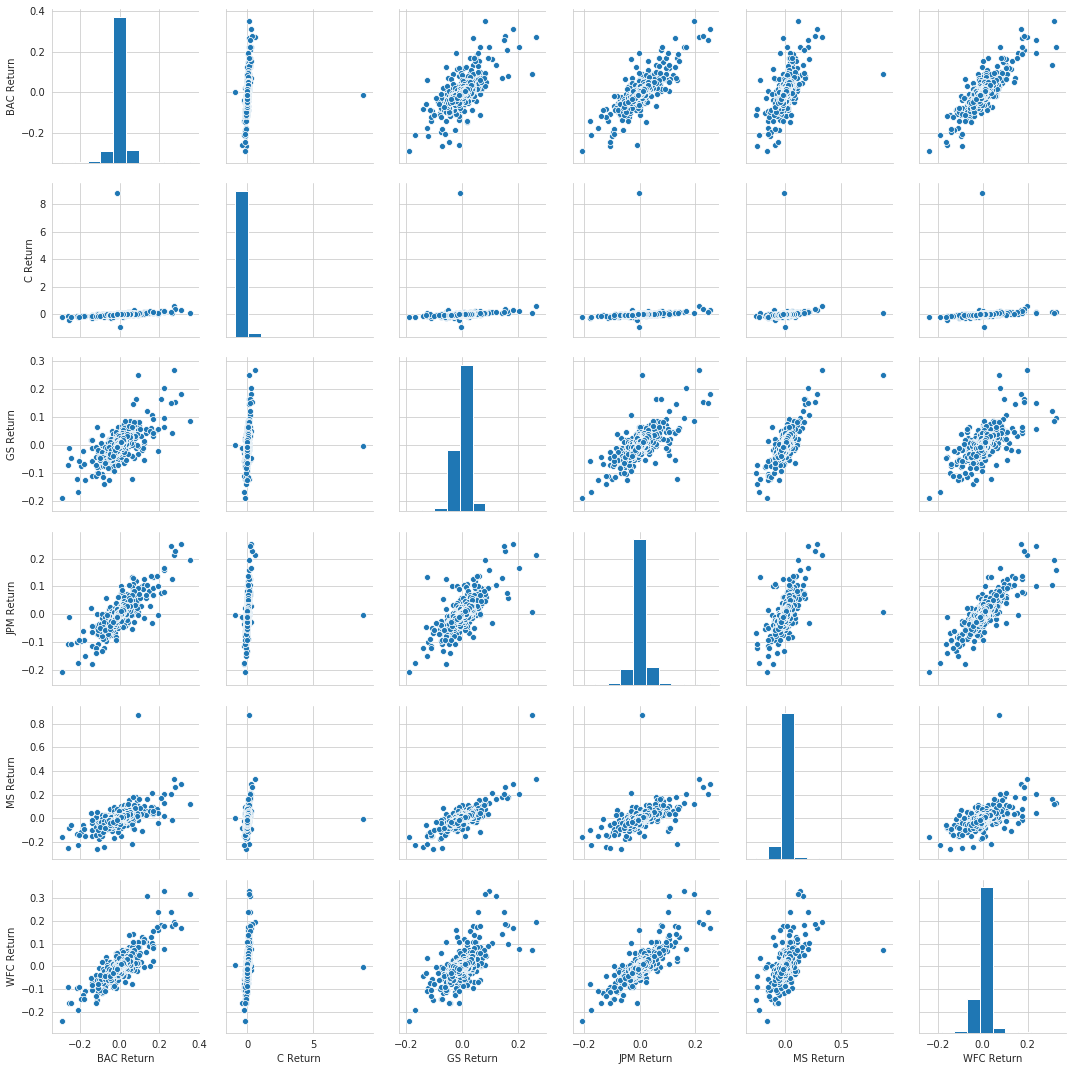

In [16]:
## Solution
import seaborn as sns
sns.set_style('whitegrid')
sns.pairplot(returns.iloc[1:])

* See solution for details about Citigroup behavior....

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [17]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2011-05-06
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [37]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2011-05-09
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

* See Solution for details

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [19]:
returns.std()

BAC Return    0.036650
C Return      0.179969
GS Return     0.025346
JPM Return    0.027656
MS Return     0.037820
WFC Return    0.030233
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

(-0.08, 0.08)

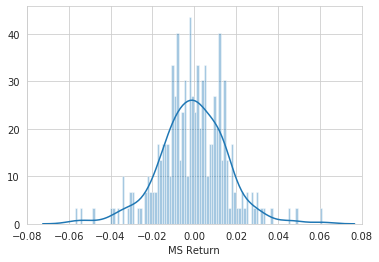

In [20]:
ax = sns.distplot(returns['MS Return'].loc['2015-01-01':'2016-01-01'], bins = 100, kde = True)
ax.set_xlim((-0.08,0.08))

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

(-0.4, 0.8)

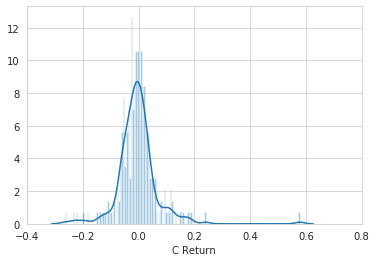

In [21]:
ax = sns.distplot(returns['C Return'].loc['2008-01-01':'2009-01-01'], bins = 150, kde = True)
ax.set_xlim((-0.4,0.8))

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

In [23]:
### Getting the cross section
close = bank_stocks.xs('Close', axis = 1, level = 'Stock Info')
close.head()

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2006-01-03,47.08,492.9,128.87,40.19,58.31,31.90
2006-01-04,46.58,483.8,127.09,39.62,58.35,31.53
2006-01-05,46.64,486.2,127.04,39.74,58.51,31.50
2006-01-06,46.57,486.2,128.84,40.02,58.57,31.68
2006-01-09,46.60,483.9,130.39,40.67,59.19,31.68


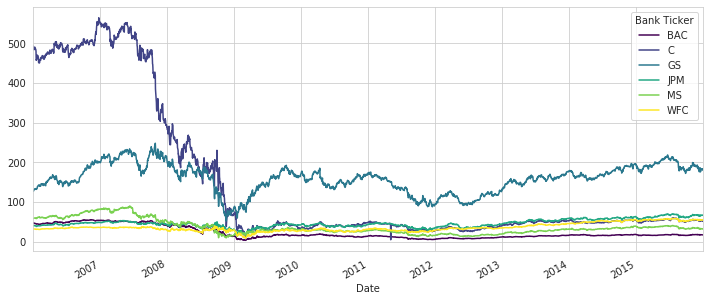

In [24]:
close.plot(figsize = (12,5), colormap = 'viridis')

In [25]:
## Using plotly 
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

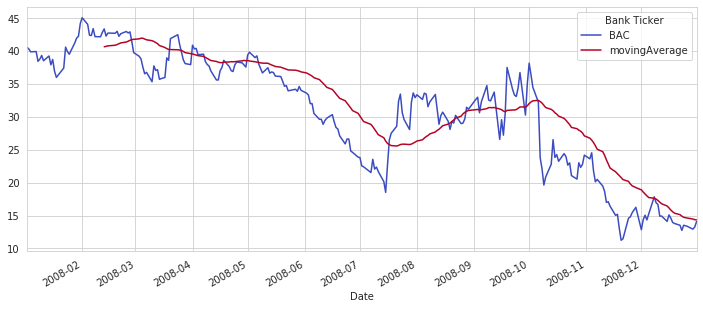

In [26]:
close['movingAverage'] = close['BAC'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean()

close[['BAC','movingAverage']].loc['2008-01-01':'2009-01-01'].plot(figsize = (12,5), colormap = 'coolwarm')

close.drop('movingAverage', axis = 1,  inplace = True)

** Create a heatmap of the correlation between the stocks Close Price.**

(6.0, 0.0)

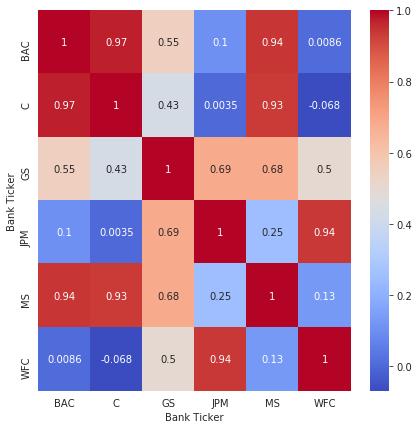

In [27]:
close_corr = close.corr() 

plt.figure(figsize = (7,7))
ax = sns.heatmap(close_corr ,cmap = 'coolwarm', annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5 , top - 0.5)

In [28]:
## Expected Output

** Optional: Use seaborn's clustermap to cluster the correlations together:**

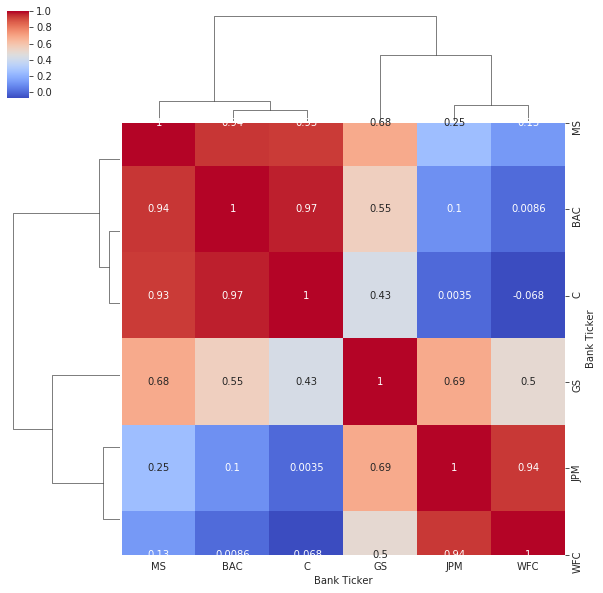

In [29]:
ax = sns.clustermap(close_corr ,cmap = 'coolwarm', annot = True)

In [30]:
## Expected Output

In [31]:
### Using plotly 

close_corr.iplot(kind='heatmap',colorscale='rdylbu')

# Part 2 (Optional)

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to skip it if any functionality is broken in the future.

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [32]:
bank_stocks['BAC'][['Open', 'High', 'Low', 'Close']].loc['2015-01-01':'2016-01-01'].iplot(kind='candle')

** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [33]:
bank_stocks['MS'][['Close']].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma')

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [34]:
bank_stocks['BAC'][['Close']].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')

# Great Job!

Definitely a lot of more specific finance topics here, so don't worry if you didn't understand them all! The only thing you should be concerned with understanding are the basic pandas and visualization oeprations.